In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport 
#matplotlib.use('TkAgg')
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
smoking_data_p1 = pd.read_excel(r"drive/MyDrive/Smoking Data/Participant1_Data.xlsx")
#smoking_data_p1_extra = pd.read_excel(r"drive/MyDrive/Smoking Data/Participant1_Extra_SW_SG_W.xlsx")
smoking_data_p3 = pd.read_excel(r"drive/MyDrive/Smoking Data/Participant4_Data.xlsx")

In [4]:
smoking_data_list = [smoking_data_p1,  smoking_data_p3]
smoking_data = pd.concat(smoking_data_list)

smoking_data.head()

,SW_timestamp,SW_accX,SW_accY,SW_accZ,SW_lasX,SW_lasY,SW_lasZ,SW_gyroX,SW_gyroY,SW_gyroZ,...,PHN_lasZ,PHN_gyroX,PHN_gyroY,PHN_gyroZ,PHN_mgmX,PHN_mgmY,PHN_mgmZ,PHN_gpsLat,PHN_gpsLog,Class Label
0,1455278271218,-5.973572,-6.710114,2.555145,-0.474457,0.382236,0.345239,-0.014404,-0.001846,-0.028992,...,-0.161003,0.038790,0.006414,-0.004276,13.9375,39.0000,-26.25,52.238673,6.857011,SmokeSD
1,1455278271238,-5.980713,-6.838654,2.605133,-0.471420,0.249793,0.383285,0.001617,-0.005051,-0.027924,...,-0.136580,0.037568,0.025351,-0.010079,13.8750,39.0000,-26.25,52.238673,6.857011,SmokeSD
2,1455278271258,-6.025940,-6.895783,2.514679,-0.504273,0.187889,0.285115,0.009094,-0.015732,-0.027924,...,-0.116517,0.033292,0.027184,-0.009774,13.8750,38.6875,-26.25,52.238673,6.857011,SmokeSD
3,1455278271279,-5.956909,-7.031464,2.752716,-0.424346,0.048824,0.503679,0.019775,-0.015732,-0.015106,...,-0.053767,0.021380,0.025351,-0.009774,13.8125,38.8750,-26.25,52.238673,6.857011,SmokeSD
4,1455278271298,-5.959290,-6.900543,2.743195,-0.414628,0.176953,0.475054,0.006958,-0.013596,-0.004425,...,-0.207327,0.023824,0.053145,-0.015577,13.8125,38.6875,-26.25,52.238673,6.857011,SmokeSD


In [5]:
smoking_data1 = smoking_data.drop(['SW_lasX',	'SW_lasY',	'SW_lasZ',	'SW_gyroX',	'SW_gyroY',	'SW_gyroZ', 'SW_mgmX', 'SW_mgmY',
                               'SW_mgmZ', 'SW_presure', 'SW_pulse', 'Unnamed: 15', 'PHN_timestamp',
                               'PHN_accX', 'PHN_accY', 'PHN_accZ', 'PHN_lasX', 'PHN_lasY', 'PHN_lasZ',
                               'PHN_gyroX', 'PHN_gyroY', 'PHN_gyroZ', 'PHN_mgmX', 'PHN_mgmY',
                               'PHN_mgmZ', 'PHN_gpsLat', 'PHN_gpsLog'] , 
                                  axis = 'columns')

smoking_data1.head()

,SW_timestamp,SW_accX,SW_accY,SW_accZ,Class Label
0,1455278271218,-5.973572,-6.710114,2.555145,SmokeSD
1,1455278271238,-5.980713,-6.838654,2.605133,SmokeSD
2,1455278271258,-6.025940,-6.895783,2.514679,SmokeSD
3,1455278271279,-5.956909,-7.031464,2.752716,SmokeSD
4,1455278271298,-5.959290,-6.900543,2.743195,SmokeSD


In [6]:
smoking_data2 = smoking_data1.fillna(smoking_data1.mean())

In [7]:
X = smoking_data2[smoking_data2.columns[1:4]]
y = smoking_data2[smoking_data2.columns[4:5]]

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_train=encoder.fit_transform(y)
y1 = encoder.fit_transform(y_train)

In [9]:
X['label'] = y1

In [10]:
X

,SW_accX,SW_accY,SW_accZ,label
0,-5.973572,-6.710114,2.555145,4
1,-5.980713,-6.838654,2.605133,4
2,-6.025940,-6.895783,2.514679,4
3,-5.956909,-7.031464,2.752716,4
4,-5.959290,-6.900543,2.743195,4
...,...,...,...,...
779095,9.738892,-1.714233,-0.292526,6
779096,9.738892,-1.747559,-0.340134,6
779097,9.753174,-1.771362,-0.452011,6
779098,9.767456,-1.799927,-0.335373,6


In [11]:
X['label'].unique()

array([4, 5, 2, 0, 1, 3, 6])

In [12]:
arr = smoking_data1['Class Label'].unique()
arr.sort()

In [14]:
##Frame Preparation

In [15]:
import scipy.stats as stats

In [16]:
frame_size = 100
hop_size = 25 

In [17]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['SW_accX'].values[i: i + frame_size]
        y = df['SW_accY'].values[i: i + frame_size]
        z = df['SW_accZ'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [18]:
X_final, y_final = get_frames(X, frame_size, hop_size)

In [19]:
X_final.shape, y_final.shape

((67336, 100, 3), (67336,))

In [20]:
def train_test_split(X, y, split_size=0.8):
    split= int(len(X) * split_size)
    train_x = X[:split]
    train_y = y[:split]
    test_x = X[split:]
    test_y = y[split: ]
    return train_x, test_x, train_y, test_y

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final)

In [22]:
X_train.shape, X_test.shape

((53868, 100, 3), (13468, 100, 3))

In [24]:
X_train = X_train.reshape(53868, 100, 3, 1)
X_test = X_test.reshape(13468, 100, 3, 1)

In [25]:
#2D CNN Model
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [26]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 99, 2, 16)         80        
                                                                 
 dropout (Dropout)           (None, 99, 2, 16)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 1, 32)         2080      
                                                                 
 dropout_1 (Dropout)         (None, 98, 1, 32)         0         
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                200768    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [28]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [29]:
history = model.fit(X_train, y_train, epochs = 10, validation_data= (X_test, y_test), verbose=1)

Epoch 1/10
1684/1684 [==============================] - 18s 4ms/step - loss: 0.9963 - accuracy: 0.6106 - val_loss: 0.6943 - val_accuracy: 0.7624
Epoch 2/10
1684/1684 [==============================] - 6s 4ms/step - loss: 0.8385 - accuracy: 0.6778 - val_loss: 0.6420 - val_accuracy: 0.7392
Epoch 3/10
1684/1684 [==============================] - 6s 4ms/step - loss: 0.7919 - accuracy: 0.6969 - val_loss: 0.6098 - val_accuracy: 0.7467
Epoch 4/10
1684/1684 [==============================] - 7s 4ms/step - loss: 0.7538 - accuracy: 0.7157 - val_loss: 0.6606 - val_accuracy: 0.7491
Epoch 5/10
1684/1684 [==============================] - 6s 4ms/step - loss: 0.7233 - accuracy: 0.7291 - val_loss: 0.6328 - val_accuracy: 0.7769
Epoch 6/10
1684/1684 [==============================] - 6s 4ms/step - loss: 0.6900 - accuracy: 0.7400 - val_loss: 0.6438 - val_accuracy: 0.7636
Epoch 7/10
1684/1684 [==============================] - 7s 4ms/step - loss: 0.6690 - accuracy: 0.7505 - val_loss: 0.5397 - val_accuracy

In [30]:
r = [[1.4718628,-8.438782,4.603897],
[1.4623413,-8.369751,4.725296],
[1.4361572,-8.36499,4.6372223],
[1.421875,-8.386414,4.6134186],
[1.4718628,-8.417358,4.5301056],
[1.4242554,-8.462585,4.6324615],
[1.4718628,-8.453064,4.7038727],
[1.4837646,-8.467346,4.634842],
[1.5408936,-8.348328,4.6705475],
[1.4837646,-8.36261,4.544388],
[1.505188,-8.341187,4.627701],
[1.4718628,-8.422119,4.6443634],
[1.4528198,-8.372131,4.6562653],
[1.421875,-8.500671,4.6586456],
[1.4742432,-8.438782,4.615799],
[1.4504395,-8.345947,4.6824493],
[1.4337769,-8.279297,4.6134186],
[1.4766235,-8.36261,4.6181793],
[1.5004272,-8.384033,4.6562653],
[1.505188,-8.49353,4.641983],
[1.5028076,-8.307861,4.6895905],
[1.4909058,-8.36499,4.68721],
[1.4337769,-8.345947,4.699112],
[1.4575806,-8.445923,4.6443634],
[1.4052124,-8.386414,4.62294],
[1.4552002,-8.434021,4.6515045],
[1.4813843,-8.326904,4.641983],
[1.4694824,-8.405457,4.7086334],
[1.486145,-8.372131,4.55867],
[1.4766235,-8.431641,4.646744],
[1.4932861,-8.343567,4.680069],
[1.4718628,-8.350708,4.6586456],
[1.5170898,-8.30072,4.713394],
[1.5170898,-8.374512,4.7014923],
[1.467102,-8.36261,4.520584],
[1.5028076,-8.326904,4.711014],
[1.4599609,-8.403076,4.634842],
[1.4075928,-8.4435425,4.649124],
[1.4932861,-8.460205,4.6776886],
[1.5646973,-8.472107,4.8943024],
[1.6789551,-8.160278,4.775284],
[1.5170898,-8.072205,4.675308],
[1.4647217,-8.350708,4.6062775],
[1.4742432,-8.457825,4.55867],
[1.1743164,-8.436401,4.396805],
[0.95770264,-8.688721,4.3491974],
[1.024353,-8.891052,4.070694],
[1.0005493,-8.971985,3.839798],
[0.960083,-8.850586,3.9278717],
[1.0291138,-8.848206,4.0111847],
[1.0505371,-8.774414,4.115921],
[1.0386353,-8.760132,4.230179],
[1.2719116,-8.4244995,4.634842],
[1.293335,-8.384033,4.6586456],
[1.3099976,-8.30072,4.6848297],
[1.4909058,-8.329285,4.8062286],
[1.1790771,-8.093628,4.6181793],
[1.8931885,-8.662537,4.6586456],
[1.5980225,-8.29834,4.584854],
[1.5028076,-8.326904,4.822891],
[1.8670044,-8.462585,4.7871857],
[1.7098999,-8.255493,4.7157745],
[1.8241577,-8.257874,4.6253204],
[1.8598633,-8.112671,4.5991364],
[1.7265625,-8.317383,4.6062775],
[1.6956177,-8.326904,4.7610016],
[1.4956665,-8.533997,4.563431],
[1.4147339,-8.569702,4.5824738],
[1.3623657,-8.583984,4.437271],
[1.1552734,-8.438782,4.2230377],
[1.2647705,-8.674438,4.415848],
[1.2814331,-8.664917,4.4396515],
[1.3504639,-8.643494,4.5562897],
[1.5004272,-8.598267,4.661026],
[1.5551758,-8.398315,4.7205353],
[1.6408691,-8.307861,4.8062286],
[1.8051147,-8.191223,4.9728546],
[1.8051147,-8.191223,4.9728546],
[1.8051147,-8.191223,4.9728546],
[1.7932129,-7.986511,5.115677],
[1.7932129,-7.986511,5.115677],
[1.7456055,-8.012695,4.9847565],
[1.7456055,-8.012695,4.9847565],
[1.7456055,-8.012695,4.9847565],
[1.7003784,-8.317383,4.7871857],
[1.7003784,-8.317383,4.7871857],
[1.6313477,-8.198364,4.8633575],
[1.6313477,-8.198364,4.8633575],
[1.6313477,-8.198364,4.8633575],
[1.2980957,-8.238831,4.7610016],
[1.2980957,-8.238831,4.7610016],
[1.2980957,-8.238831,4.7610016],
[1.5170898,-8.357849,4.7419586],
[1.5408936,-8.310242,4.672928],
[1.5408936,-8.310242,4.672928],
[1.5408936,-8.310242,4.672928],
[1.588501,-8.203125,4.925247],
[1.588501,-8.203125,4.925247],
[1.588501,-8.203125,4.925247],
[1.6765747,-8.174561,4.839554]]

In [35]:
len(r)

100

In [31]:
r_array = np.asarray(r)
r_3d = np.expand_dims(r_array, axis=0)
r_3d.shape

(1, 100, 3)

In [32]:
prediction = model.predict(np.asarray(r_3d))
prediction

array([[2.0350482e-04, 5.4160873e-03, 1.8558611e-17, 8.5780572e-14,
        9.5317966e-01, 4.1200828e-02, 1.2334603e-28]], dtype=float32)

In [34]:
arr

array(['DrinkSD', 'DrinkST', 'Eat', 'Sit', 'SmokeSD', 'SmokeST', 'Stand'],
      dtype=object)

In [33]:
np.argmax(prediction)

4

In [36]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

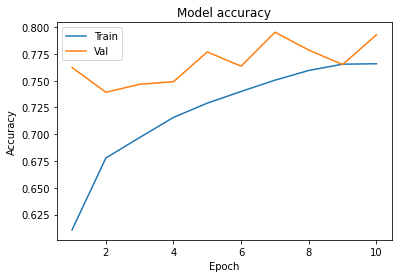

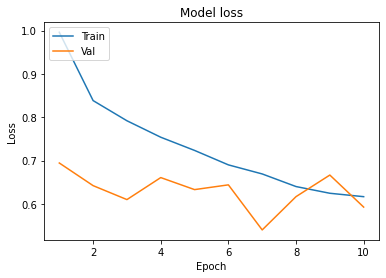

In [37]:
plot_learningCurve(history, 10)

In [38]:
!mkdir -p saved_model
model.save('saved_model/modelNEW')
model.save('modelNEW.h5')

INFO:tensorflow:Assets written to: saved_model/modelNEW/assets
